In [1]:
# Handout 5

In [2]:
### Ex. 1
def read_matrix(fname):
    """ Read distance matrix from file
    """
    dist={}
    with open(fname,) as f:
        cols=next(f).split() # First line contains column labels
        for line in f: # Following lines contain row label and distances
            entries = line.split()
            r = entries[0] # row label
            dist[r]={}
            for c,v in zip(cols,entries[1:]): # pair column label with distance entry 
                if r!=c: # Diagonal entries are discarded
                    dist[r][c] = float(v)
    return dist


In [3]:
### Ex. 2
def count_leaves(node):
    """ Count the number of elementary objects in a nested tuple
    """
    if isinstance(node,tuple):
        count = 0
        for child in node:
            count += count_leaves(child)
        return count
    else:
        return 1

def count_leaves_alt(node):
        return sum(count_leaves(child) for child in node) if isinstance(node,tuple) else 1


In [4]:
### Ex. 3
def merge(dist,a,b):
    """ Merge clusters a and b upadting the distance matrix dist
        The new cluster ist returned.
    """
    n = count_leaves(a)
    m = count_leaves(b)
    c = (a,b) # merged cluster
    dist[c] = {} # determine distances to merged cluster
    for k in dist.keys():
        if k==a or k==b or k==c: # these distances are not required
            continue
        nd = (dist[k][a]*n+dist[k][b]*m)/(n+m)
        dist[c][k] = nd
        dist[k][c] = nd
    # remove obsolete clusters from distance matrix
    del dist[a]
    del dist[b]
    for k in dist.keys():
        if k!=c:
            del dist[k][a]
            del dist[k][b]
    return c

In [5]:
### Ex. 4
def find_min(dist):
    """ The the two clusters closest together according to the distance matrix dist
    """
    minval=1e99
    minpair=()
    for a in dist:
        for b in dist[a]:
            if dist[a][b]<minval:
                minval=dist[a][b]
                minpair=(a,b)
    return minpair

def find_min_alt(dist):
    return min(((a,b) for a in dist for b in dist[a]),key=lambda x: dist[x[0]][x[1]])


In [6]:
### Ex. 5
def cluster(dist):
    """ Hierarchically cluster objects, given by the keys of the dstance matrox
       according to their distances
    """
    height={}
    for k in dist:
        height[k] = 0
    while len(dist)>1:
        a,b = find_min(dist)
        c = (a,b)
        height[c] = dist[a][b]/2
        merge(dist,a,b)
    return c,height


In [7]:
### Ex. 7
### Displaying the tree using matplotlib
import matplotlib.pyplot as plt

def getDepth(node):
    if isinstance(node,tuple):
        return max(getDepth(node[0]),getDepth(node[1]))+1
    else:
        return 0
### Recursive helper function
def showtree_rec(node,offset,depth,height=None):
    if not isinstance(node,tuple):
        x = offset
        y = height[node] if height else depth
        plt.plot([x,x],[0,y],'k')
        plt.text(x,0,node)
        return x,y,1
    else:
        xl,yl,nl = showtree_rec(node[0],offset,depth-1,height)
        xr,yr,nr = showtree_rec(node[1],offset+nl,depth-1,height)
        y = height[node] if height else depth
        plt.plot([xl,xl],[yl,y],'k')
        plt.plot([xr,xr],[yr,y],'k')
        plt.plot([xl,xr],[y,y],'k')
        return (xl+xr)/2,y,nl+nr

def showtree(node,height=None):
    showtree_rec(node,0,getDepth(node),height)
    axes = plt.gca()
    lim = axes.get_ylim()
    delta=(lim[1]-lim[0])*0.05
    axes.set_ylim(lim[0]-delta,lim[1]+delta)
    lim = axes.get_xlim()
    delta=(lim[1]-lim[0])*0.05
    axes.set_xlim(lim[0]-delta,lim[1]+delta)
    #plt.axis('off')
    plt.show()


In [8]:
### Ex. 7
# Displaying the tree as ascii art
### Recursive helper function
def asciitree_rec(node):
    """ Create an ASCII tree representation of nested tuple node
        Returns a tuple of
        - List of strings containing ASCII art
        - Number of spaces left of the vertcal beam of the root node
        - Number of spaces right of the vertcal beam of the root node
    """
    
    if not isinstance(node,tuple):
        # A terminal node consists of a veritcal  beam and the node label
        return ['|',node],0,0
    else:
        # Get ASCII art for the left child
        left,left_left,left_right= asciitree_rec(node[0])
        # Get ASCII art for the right child
        right,right_left,right_right = asciitree_rec(node[1])
        # Total width of left subtree
        lr_left = left_left+1+left_right+1
        # Total width of right subtree
        lr_right = right_left+1+right_right+1
        
        # Construct the horizontal bar joining the vertical beams
        horizontal_bar=' '*left_left+'/'+'-'*left_right+'-+-'+'-'*right_left+'\\'
        # At vertical beam for root node
        vert_bar=' '*lr_left+'|'
        # Construct combined ASCII art
        # ... root node and joining horizontal bar
        joined = [vert_bar,horizontal_bar]
        l_format="{:<%d}"%lr_left # Each line of the left tree needs to be lr_left wide
        # Both trees might have different depth
        # The first line represnting the veritcal bar is copied for a subtree if necessary
        # so both trees have the same depth
        max_depth=max(len(left),len(right))
        for l,r in zip([left[0]]*(max_depth-len(left))+left,[right[0]]*(max_depth-len(right))+right):
            lr = l_format.format(l)+"  "+r
            joined.append(lr)
        return joined,lr_left,lr_right
            
    
def asciitree(node):
    rv,_,_ = asciitree_rec(node)
    for s in rv:
        print(s)


In [9]:
dist=read_matrix("distances.txt")
c,height = cluster(dist)

In [10]:
asciitree(c)

  |
/-+---------------------------\
|                             |
|                 /-----------+-------\
|                 |                   |
|         /-------+---\           /---+---\
|         |           |           |       |
|     /---+---\     /-+---\       |     /-+---\
|     |       |     |     |       |     |     |
|   /-+-\   /-+-\   |   /-+-\   /-+-\   |   /-+-\
|   |   |   |   |   |   |   |   |   |   |   |   |
M   A   K   B   L   J   E   G   C   H   D   F   I


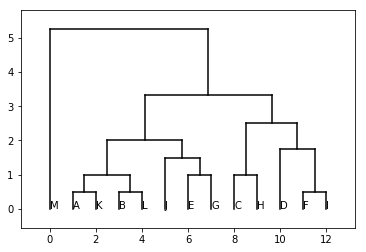

In [11]:
showtree(c,height)

In [12]:
### Ex.6
### Object oriented approach - Class definitions

class TreeCluster: # Base class
    def __init__(self,height):
        self._height = height 
        pass
    
    def depth(self):
        if isinstance(self,TerminalNode):
            return 0
        elif isinstance(self,InnerNode):
            return max(self._left.depth(),self._right.depth())+1
        else:
            raise Exception("Illegal node type")
    
    def size(self):
        if isinstance(self,TerminalNode):
            return 1
        elif isinstance(self,InnerNode):
            return self._left.size() + self._right.size()
        else:
            raise Exception("Illegal node type")
            
    def toTuple(self):
        if isinstance(self,TerminalNode):
            return self._label
        elif isinstance(self,InnerNode):
            return (self._left.toTuple(), self._right.toTuple())
        else:
            raise Exception("Illegal node type")
    
    def plot_tree(self,axes):
        self._plot_tree_rec(axes,0)
        lim = axes.get_ylim()
        delta=(lim[1]-lim[0])*0.05
        axes.set_ylim(lim[0]-delta,lim[1]+delta)
        lim = axes.get_xlim()
        delta=(lim[1]-lim[0])*0.05
        axes.set_xlim(lim[0]-delta,lim[1]+delta)
        


class TerminalNode(TreeCluster):
    
    def __init__(self,label):
        TreeCluster.__init__(self, 0)
        self._label = label
        
    def label(self):
        return self._label
    
    def _plot_tree_rec(self,axes,offset):
        x = offset
        y = self._height
        axes.plot([x,x],[0,y],'k')
        axes.text(x,0,self._label)
        return x,y,1

    def __eq__(self, other):
        return isinstance(other, self.__class__) and self._label == other._label
    
    def __hash__(self):
        return hash(self._label)
    
    def __repr__(self):
        return 'TerminalNode({})'.format(self._label)
    
class InnerNode(TreeCluster):
    
    def __init__(self,left,right,height):
        TreeCluster.__init__(self, height)
        assert isinstance(left,TreeCluster), "Left child of a InnerNode has to be a TreeCluster"
        assert isinstance(right,TreeCluster), "Right child of a InnerNode has to be a TreeCluster"
        self._left = left
        self._right = right
    
    def _plot_tree_rec(self,axes,offset):
        xl,yl,nl = self._left._plot_tree_rec(axes,offset)
        xr,yr,nr = self._right._plot_tree_rec(axes,offset+nl)
        y = self._height
        axes.plot([xl,xl],[yl,y],'k')
        axes.plot([xr,xr],[yr,y],'k')
        axes.plot([xl,xr],[y,y],'k')
        return (xl+xr)/2,y,nl+nr

    def __eq__(self, other):
        return isinstance(other, self.__class__) and self._left == other._left and self._right == other._right
    
    def __hash__(self):
        return hash((hash(self._left), hash(self._right)))

    def __repr__(self):
        return 'InnerNode({},{},{})'.format(self._left,self._right,self._height)


In [13]:
### Ex.6 - Object oriented approach

def read_matrix_tree(fname):
    dist={}
    with open(fname,) as f:
        cols = next(f).split()
        cols = [TerminalNode(n) for n in cols]
        for line in f:
            entries = line.split()
            r = TerminalNode(entries[0])
            dist[r]={}
            for c,v in zip(cols,entries[1:]):
                if r!=c:
                    dist[r][c] = float(v)
    return dist

def merge_tree(dist,a,b,height):
    n = a.size()
    m = b.size()
    c = InnerNode(a,b,height)
    dist[c] = {}
    for k in dist.keys():
        if k==a or k==b or k==c:
            continue
        nd = (dist[k][a]*n+dist[k][b]*m)/(n+m)
        dist[c][k] = nd
        dist[k][c] = nd
    del dist[a]
    del dist[b]
    for k in dist.keys():
        if k!=c:
            del dist[k][a]
            del dist[k][b]
    return c

def cluster_tree(dist):
    while len(dist)>1:
        a,b = find_min(dist) # find_min from tuple approach
        height = dist[a][b]/2
        c = merge_tree(dist,a,b,height)
    return c


In [14]:
a=read_matrix_tree("distances.txt")
cluster_tree=cluster_tree(a)


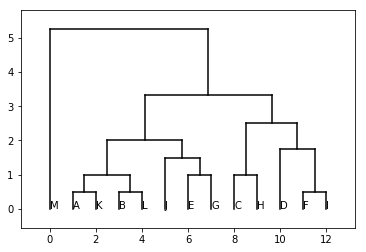

In [15]:
import matplotlib.pyplot as plt
axes=plt.gca()
cluster_tree.plot_tree(axes)